In [1]:
'''

INFO 6390 Final Project
Credit Card Usage Analysis 
Data Set: https://www.kaggle.com/noordeen/card-usage


'''

'\n\nINFO 6390 Final Project\nCredit Card Usage Analysis \nData Set: https://www.kaggle.com/noordeen/card-usage\n\n\n'

# I. Module imports, data input and cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm

%matplotlib inline

In [3]:
%pwd

'/Users/likunli/Documents/GitHub/credit_card_usage'

In [4]:
!ls

CreditCardUsage.csv           README.md
CreditCardUsage.ipynb         final-project-requirement.pdf


In [5]:
df = pd.read_csv("/Users/likunli/Documents/GitHub/credit_card_usage/CreditCardUsage.csv")
print(df.shape)

(8950, 18)


In [6]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [8]:
df.drop(columns=['CUST_ID', 'PRC_FULL_PAYMENT', 'TENURE'], inplace=True)

In [9]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'],
      dtype='object')

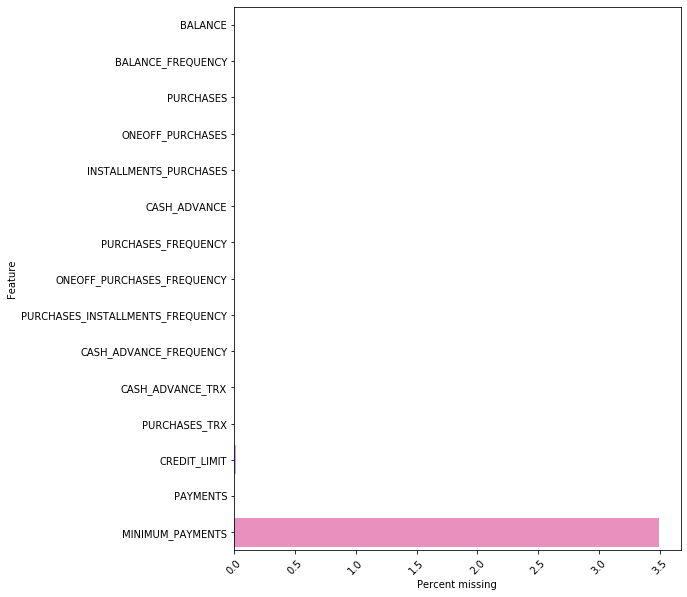

In [10]:
'''Calculate percentage of null values for each column or feature'''

null_vals = df.isnull().sum()/len(df)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,10))
plt.xticks(rotation=45)
sns.barplot(x = "Percent missing", y ="Feature", data = null_vals, orient = "h")

In [11]:
'''fill the null value in field CREDIT_LIMIT and MINIMUM_PAYMENTS with median'''

df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True)

In [12]:

# df2 = df [['BALANCE','BALANCE_FREQUENCY','PURCHASES','PURCHASES_FREQUENCY', 'PAYMENTS', 'CREDIT_LIMIT', 'MINIMUM_PAYMENTS']]
# df2 = df [['PURCHASES','CREDIT_LIMIT']]

# II. Data Pre-processing

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [14]:
'''Looks like the data is skewed. Maybe monetary is not, but the other two definitely are skewed. We log
transform the data to remove the skew. Add a constant to offset any negative values. '''

df_normalized = (np.log(df + 1))
print(df_normalized.shape)
df_normalized.head()

(8950, 15)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,5.747301
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483


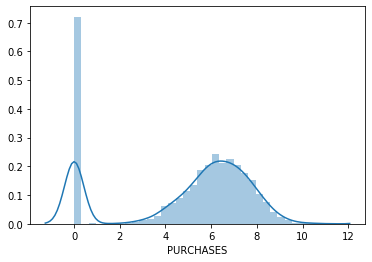

In [15]:
'''Has log transfors made any difference?'''

sns.distplot(df_normalized['PURCHASES'])

In [16]:
scaler = StandardScaler()
Scaled_df = scaler.fit_transform(df_normalized)

In [17]:
df_scaled = pd.DataFrame(Scaled_df,columns=df.columns)
df_scaled.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,-2.666861e-17,3.049429e-15,1.379306e-15,1.040682e-14,-2.190179e-16,-6.788549e-16,3.539068e-17,9.639142e-15,-2.344047e-15,1.034306e-16,1.113944e-17,-8.335232e-16,1.092412e-14,4.079418e-16,-1.783055e-16
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-3.060633e+00,-4.172393e+00,-1.679855e+00,-9.870896e-01,-1.087454e+00,-9.307329e-01,-1.302799e+00,-7.324800e-01,-9.582565e-01,-7.243604e-01,-8.100687e-01,-1.379210e+00,-5.079410e+00,-4.161996e+00,-5.040840e+00
25%,-6.455634e-01,1.080159e-01,-4.097152e-01,-9.870896e-01,-1.087454e+00,-9.307329e-01,-1.014151e+00,-7.324800e-01,-9.582565e-01,-7.243604e-01,-8.100687e-01,-8.746552e-01,-8.741531e-01,-4.229376e-01,-6.576937e-01
50%,3.039373e-01,4.927100e-01,3.403734e-01,1.414854e-01,3.721960e-01,-9.307329e-01,1.593847e-01,-3.630419e-01,-4.113045e-01,-7.243604e-01,-8.100687e-01,1.344545e-01,-1.075230e-01,8.164312e-02,-1.442709e-01
75%,7.284269e-01,4.927100e-01,7.246132e-01,9.722184e-01,9.081215e-01,1.036809e+00,1.043343e+00,4.784703e-01,1.027349e+00,5.561843e-01,7.846025e-01,7.247459e-01,8.356521e-01,5.818980e-01,6.458797e-01
max,1.834341e+00,4.927100e-01,2.023087e+00,2.283062e+00,2.163264e+00,2.086805e+00,1.196820e+00,2.466762e+00,1.501139e+00,5.122793e+00,3.965987e+00,2.903371e+00,2.701570e+00,2.644753e+00,4.554165e+00


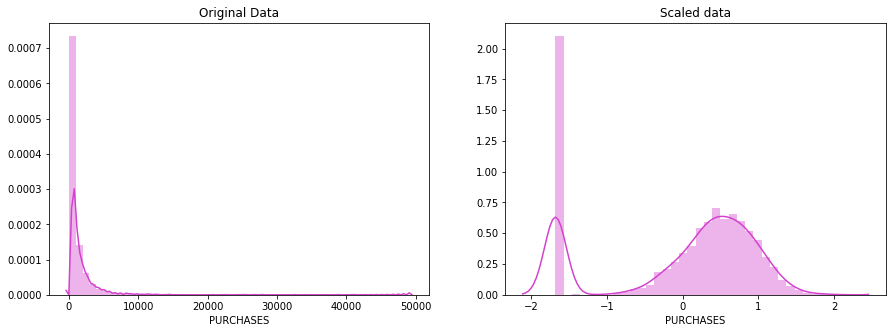

In [18]:
fig, ax=plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['PURCHASES'], ax=ax[0],color='#D341CD')
ax[0].set_title("Original Data")
sns.distplot(df_scaled['PURCHASES'], ax=ax[1],color='#D341CD')
ax[1].set_title("Scaled data")
plt.show()

# III. ML Algorithm - KNN

In [19]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=4, random_state=1)

In [20]:

y_kmeans= k_means.fit(df_scaled)
df_kmean = df_scaled.copy()
label  = pd.DataFrame(k_means.labels_, columns= ['label'])
df_kmean = pd.concat([df, label], axis =1)
df_kmean.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,label
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0


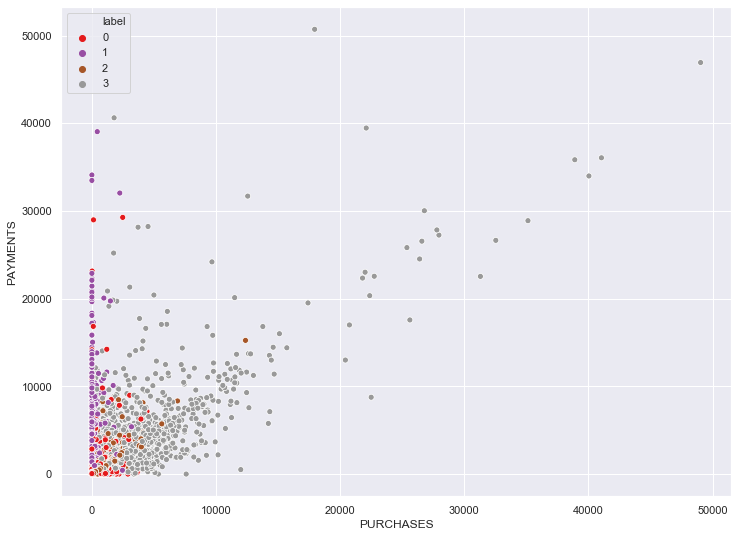

In [25]:
sns.set(rc={'figure.figsize':(12,9)})
sns.scatterplot(x = 'PURCHASES', y = 'PAYMENTS', hue = 'label', data = df_kmean, palette = 'Set1')

# IV. ML Algorithm - RNN 

# V. ML Algorithm - CNN